In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data_path = '/home/deme01/TORCS_train.tfrecords'

feature = {'train/fast': tf.FixedLenFeature([], tf.float32),
    'train/dist_RR': tf.FixedLenFeature([], tf.float32),
    'train/dist_MM': tf.FixedLenFeature([], tf.float32),
    'train/dist_LL': tf.FixedLenFeature([], tf.float32),
    'train/toMarking_RR': tf.FixedLenFeature([], tf.float32),
    'train/toMarking_MR': tf.FixedLenFeature([], tf.float32),
    'train/toMarking_ML': tf.FixedLenFeature([], tf.float32),
    'train/toMarking_LL': tf.FixedLenFeature([], tf.float32),
    'train/dist_R': tf.FixedLenFeature([], tf.float32),
    'train/dist_L': tf.FixedLenFeature([], tf.float32),
    'train/toMarking_R': tf.FixedLenFeature([], tf.float32),
    'train/toMarking_M': tf.FixedLenFeature([], tf.float32),
    'train/toMarking_L': tf.FixedLenFeature([], tf.float32),
    'train/angle': tf.FixedLenFeature([], tf.float32),
    'train/image': tf.FixedLenFeature([], tf.string)}

# Create a list of filenames and pass it to a queue
filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)
# Define a reader and read the next record
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)
# Decode the record read by the reader
features = tf.parse_single_example(serialized_example, features=feature)

# Cast label data into float32
fast = tf.cast(features['train/fast'], tf.float32)

# rescale all targets to [0,1], numbers were taken from source code of DeepDriving
dist_RR = tf.cast(features['train/dist_RR'], tf.float32) / 95.0 + 0.12
dist_MM = tf.cast(features['train/dist_MM'], tf.float32) / 95.0 + 0.12
dist_LL = tf.cast(features['train/dist_LL'], tf.float32) / 95.0 + 0.12

toMarking_RR = tf.cast(features['train/toMarking_RR'], tf.float32) / 6.8752 - 0.48181
toMarking_MR = tf.cast(features['train/toMarking_MR'], tf.float32) / 6.25 + 0.02
toMarking_ML = tf.cast(features['train/toMarking_ML'], tf.float32) / 6.25 + 0.98
toMarking_LL = tf.cast(features['train/toMarking_LL'], tf.float32) / 6.8752 + 1.48181

dist_R = tf.cast(features['train/dist_R'], tf.float32) / 95.0 + 0.12
dist_L = tf.cast(features['train/dist_L'], tf.float32) / 95.0 + 0.12

toMarking_R = tf.cast(features['train/toMarking_R'], tf.float32) / 5.6249 - 0.34445
toMarking_M = tf.cast(features['train/toMarking_M'], tf.float32) / 6.8752 + 0.39091
toMarking_L = tf.cast(features['train/toMarking_L'], tf.float32) / 5.6249 + 1.34445

angle = tf.cast(features['train/angle'], tf.float32) / 1.1 + 0.5

# Creates batches by randomly shuffling tensors
fasts, dist_RRs, dist_MMs, dist_LLs, toMarking_RRs, toMarking_MRs, toMarking_MLs, toMarking_LLs, dist_Rs, dist_Ls, toMarking_Rs, toMarking_Ms, toMarking_Ls, angles = tf.train.shuffle_batch(
                    [fast, dist_RR, dist_MM, dist_LL, toMarking_RR, toMarking_MR, toMarking_ML,
                        toMarking_LL, dist_R, dist_L, toMarking_R, toMarking_M, toMarking_L, angle],
                        batch_size=64, capacity=50000, num_threads=8, min_after_dequeue=10000, allow_smaller_final_batch=True)


In [28]:
values = np.zeros((0,))

with tf.Session() as sess:

    # Initialize all global and local variables
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)

    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    for batch_index in range(100):
        values = np.concatenate([values, sess.run([angles])[0]], axis=0)
        
    # Stop the threads
    coord.request_stop()

    # Wait for threads to stop
    coord.join(threads)
    sess.close()

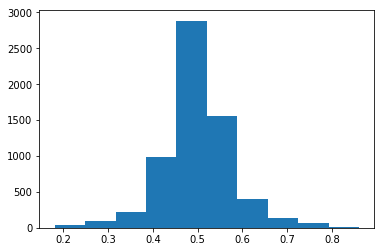

In [29]:
plt.hist(values)
plt.show()